In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5963,BC Lotto Check,FAMILY,3.0,10,717k,"5,000+",Free,0,Everyone,Entertainment,"June 22, 2016",0.0.7,4.0.3 and up
4899,AC Freedom,BUSINESS,3.5,537,Varies with device,"100,000+",Free,0,Everyone,Business,"May 25, 2018",Varies with device,Varies with device
7119,CB Background - Free HD Wallpaper Images,PERSONALIZATION,4.1,4538,3.3M,"1,000,000+",Free,0,Everyone,Personalization,"March 24, 2018",3.1.0,4.0 and up
629,chat live chat,DATING,NaN,24,3.9M,"1,000+",Free,0,Mature 17+,Dating,"July 26, 2018",1.0,4.0 and up
5049,iFunny :),FAMILY,4.4,503757,Varies with device,"10,000,000+",Free,0,Mature 17+,Entertainment,"August 2, 2018",Varies with device,Varies with device
3987,Clash Royale,FAMILY,4.6,23125280,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
6082,Unseen - No Last Seen,TOOLS,4.4,103909,9.2M,"5,000,000+",Free,0,Everyone,Tools,"May 11, 2018",2.2.7,4.3 and up
7526,CL-Customer Care,HEALTH_AND_FITNESS,NaN,2,6.8M,5+,Free,0,Everyone,Health & Fitness,"June 14, 2018",1.3,4.0.3 and up
4296,OST),FAMILY,3.7,4444,10M,"500,000+",Free,0,Everyone,Entertainment,"July 6, 2018",3.0.12,4.1 and up
3224,GPS Status & Toolbox,TRAVEL_AND_LOCAL,4.5,149723,4.1M,"10,000,000+",Free,0,Everyone,Travel & Local,"June 13, 2018",8.1.171,4.0 and up


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
print('The no of records in the Data set are:',len(df))

The no of records in the Data set are: 10841


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.shape

(10841, 13)

## Data Preprocessing

#### Reviews

In [11]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df=df.drop(df.index[10472])

In [13]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
# The Reviews Feature must be in integer type
df["Reviews"] = df["Reviews"].astype('int')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


#### Size

In [17]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
# Removing all characters from Size and converting to float

df['Size'] = df['Size'].str.replace('M','000')

In [19]:
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = df['Size'].replace('Varies with device',np.nan)
df['Size'] = df['Size'].astype(float)

In [20]:
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [21]:
for i in df['Size']:
    if i < 10:
        df['Size'] = df['Size'].replace(i,i*1000)
df['Size'] = df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


#### Installs and Price

In [24]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [25]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [26]:
#The feature Installs must be of integer type.
#The characters ',' and '+' must be removed. \ Example: '10,000+' to 10000
#The feature Price must be of floating type.
#The suffix '$' must be removed if Price is non-zero. \ Example: '$4.99' to 4.99

In [27]:
items_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col] = df[col].str.replace(item,"")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [29]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [30]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


#### Last Updated

In [32]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [33]:
df['Updated_Month'] = df['Last Updated'].dt.month
df['Updated_Year'] = df['Last Updated'].dt.year

In [34]:
df.drop('Last Updated',axis=1,inplace=True)

In [35]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(4), object(7)
memory usage: 1.1+ MB


#### Dropping Nulls 

In [38]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
Updated_Month        0
Updated_Year         0
dtype: int64

In [39]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 
                     'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null


,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


### Handling Missing Values

In [76]:
si = SimpleImputer(strategy="median")
df['Rating'] = si.fit_transform(df[['Rating']])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(4), object(7)
memory usage: 1.1+ MB


In [82]:
df['Size'] = si.fit_transform(df[['Size']])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(4), object(7)
memory usage: 1.1+ MB


In [86]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12444\3544393027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)


In [88]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

## Deleting Duplicated data

In [98]:
df.duplicated().sum()

484

In [100]:
df.drop_duplicates(inplace=True)

In [102]:
df.duplicated().sum()

0

In [107]:
#Extracting numerical columns and Categorical Columns

In [105]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']
num_cols

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Month',
 'Updated_Year']

In [109]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

## Check Outliers

<Axes: ylabel='Rating'>

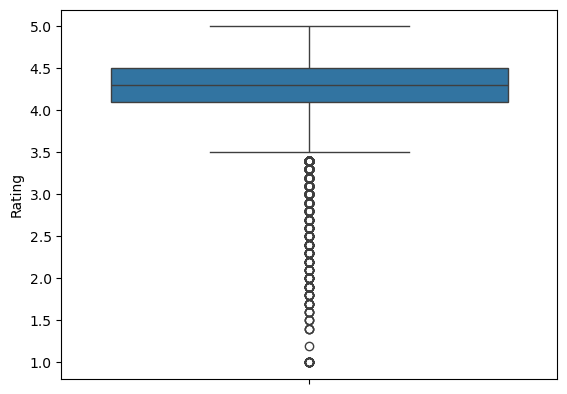

In [112]:
sns.boxplot(df["Rating"])

<Axes: ylabel='Size'>

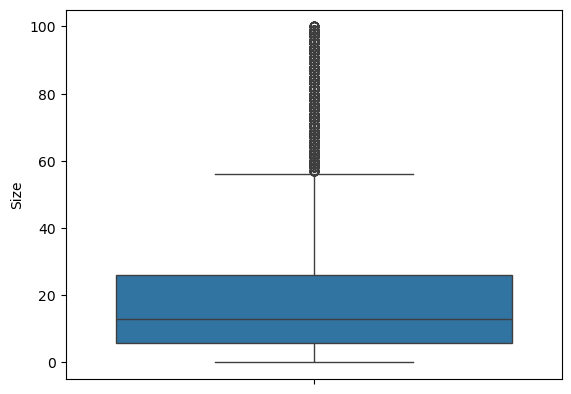

In [114]:
sns.boxplot(df["Size"])

<Axes: ylabel='Installs'>

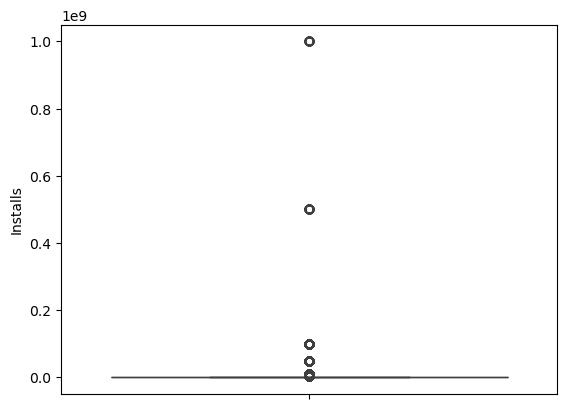

In [116]:
sns.boxplot(df["Installs"])

<Axes: ylabel='Price'>

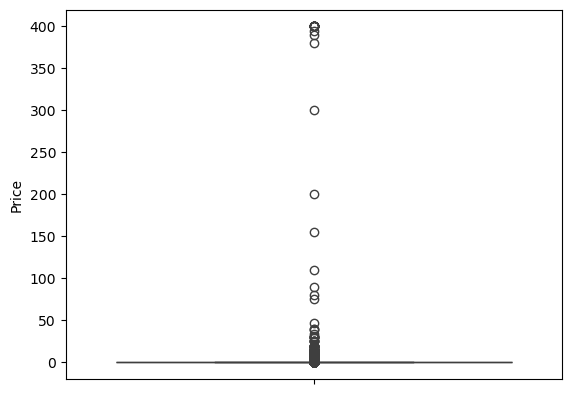

In [118]:
sns.boxplot(df["Price"])

# Exploratory Data Analysis

### Category Columns

In [121]:
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   842
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

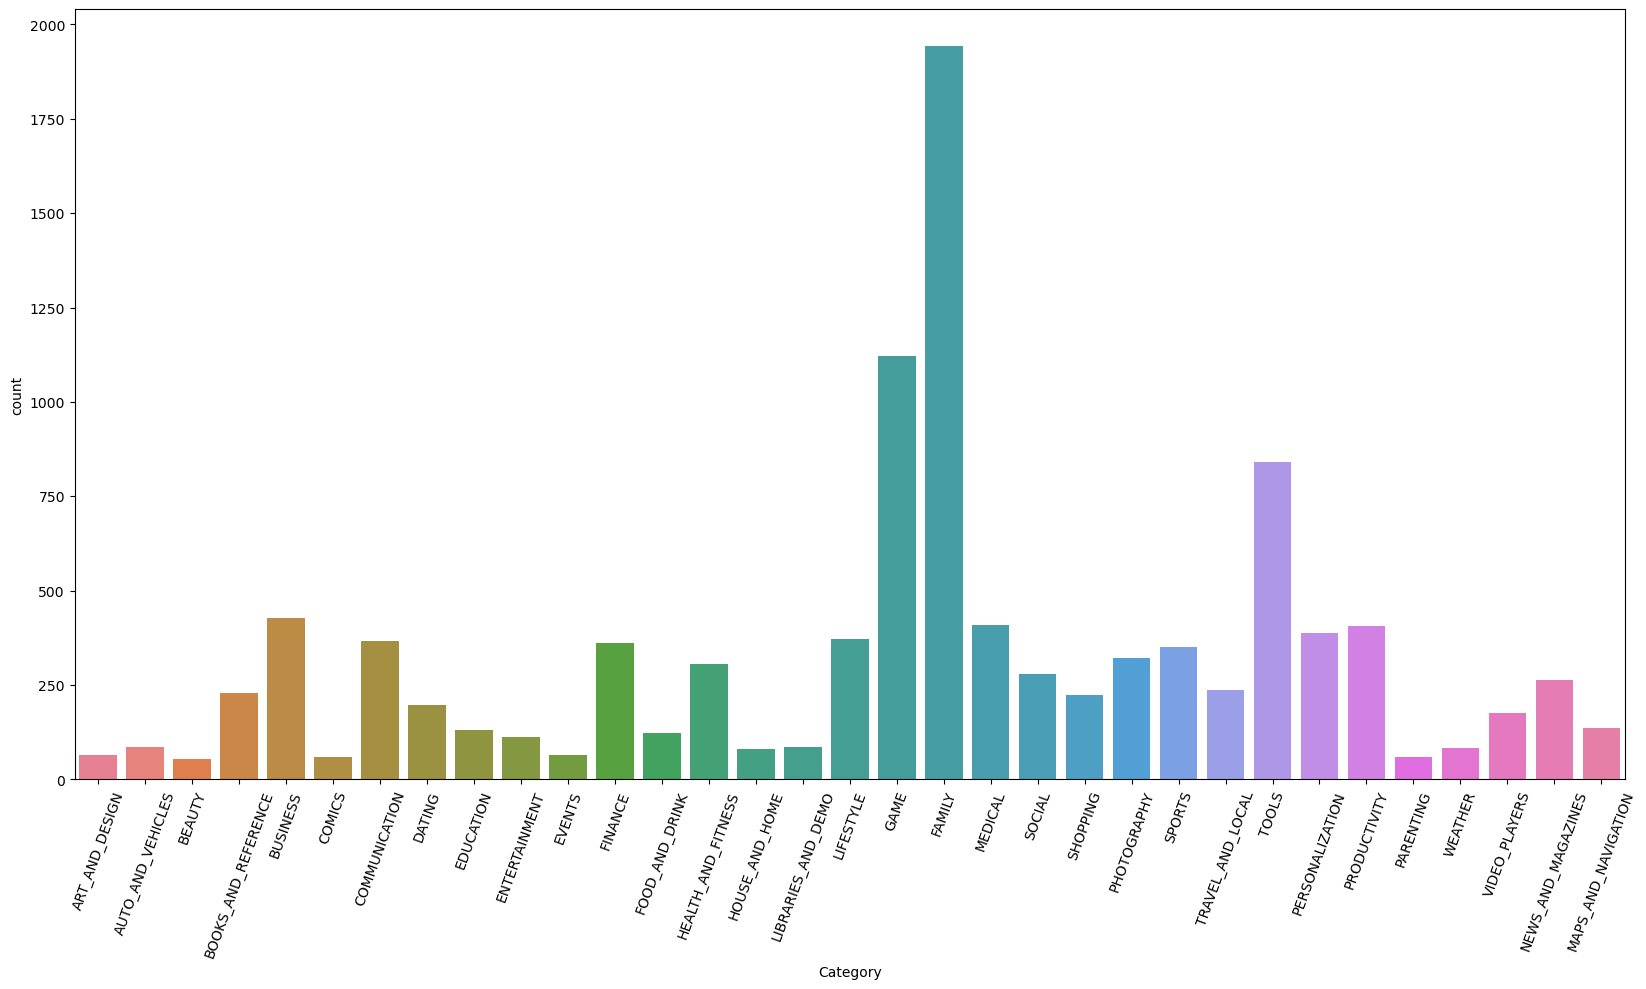

In [132]:
#plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=df,hue='Category')
plt.xticks(rotation=70)

In [134]:
## Category vs Rating Analysis

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'HEALTH_AND_FITNESS'),
  Text(2, 0, 'SHOPPING'),
  Text(3, 0, 'LIFESTYLE'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'COMMUNICATION'),
  Text(6, 0, 'ART_AND_DESIGN'),
  Text(7, 0, 'COMICS'),
  Text(8, 0, 'PERSONALIZATION'),
  Text(9, 0, 'GAME'),
  Text(10, 0, 'MEDICAL'),
  Text(11, 0, 'BUSINESS'),
  Text(12, 0, 'PRODUCTIVITY'),
  Text(13, 0, 'NEWS_AND_MAGAZINES'),
  Text(14, 0, 'FINANCE'),
  Text(15, 0, 'SOCIAL'),
  Text(16, 0, 'PHOTOGRAPHY'),
  Text(17, 0, 'BOOKS_AND_REFERENCE'),
  Text(18, 0, 'SPORTS'),
  Text(19, 0, 'FOOD_AND_DRINK'),
  Text(20, 0, 'PARENTING'),
  Text(21, 0, 'EVENTS'),
  Text(22, 0, 'TRAVEL_AND_LOCAL'),
  Text(23, 0, 'DATING'),
  Text(24, 0, 'LIBRARIES_AND_DEMO'),
  Text(25, 0, 'MAPS_AND_NAVIGATION'),
  Text(26, 0, 'VIDEO_PLAYERS'),
  Text(27, 0, '

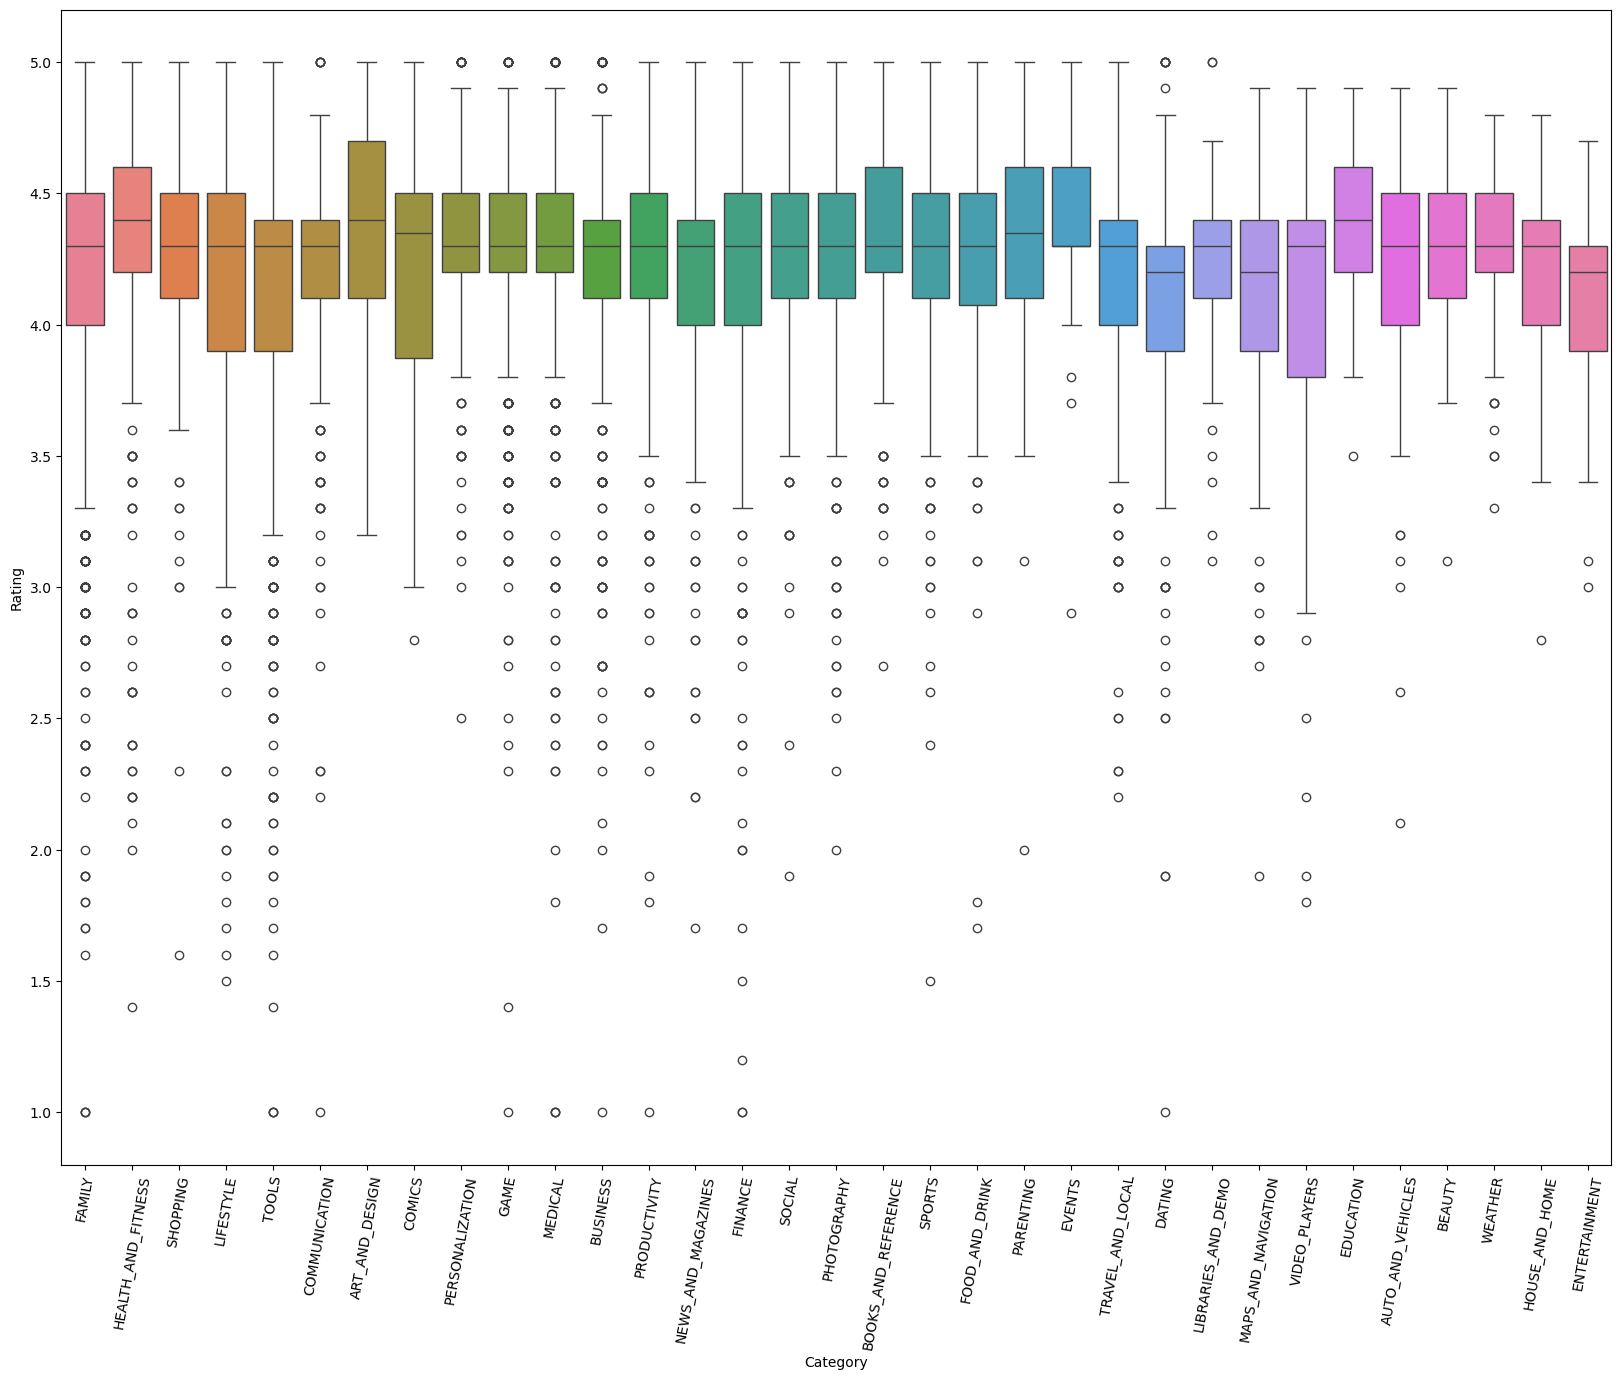

In [138]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = df.sort_values('Rating',ascending=False),hue='Category')
plt.xticks(rotation=80)

In [140]:
#Type Column
df['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

([0, 1], [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

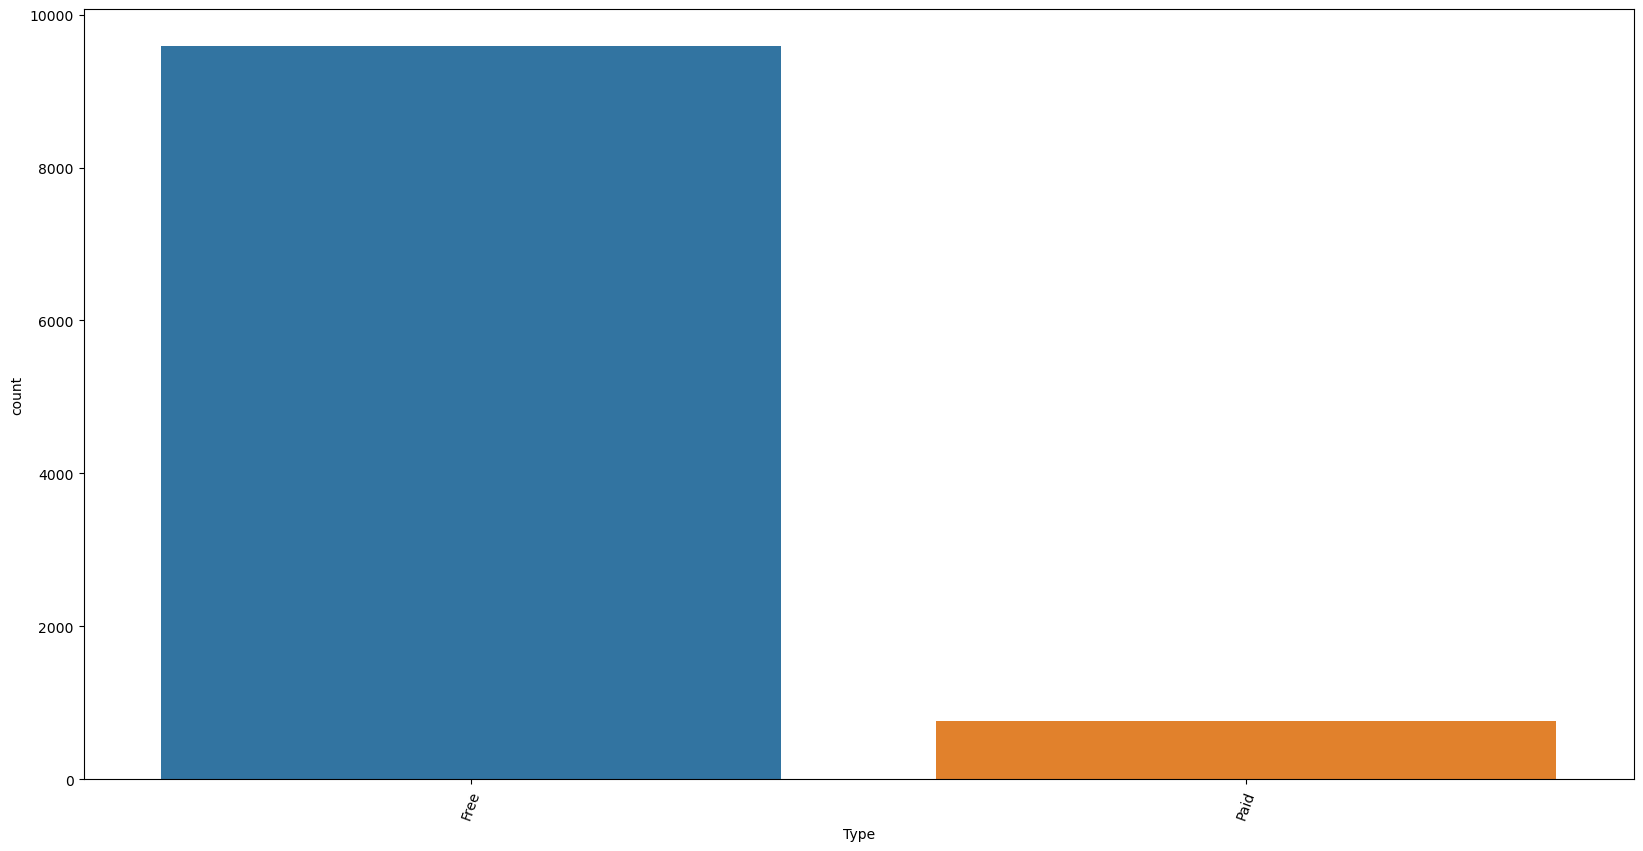

In [144]:
sns.countplot(x='Type',data=df,hue='Type')
plt.xticks(rotation=70)

<Figure size 1500x800 with 0 Axes>

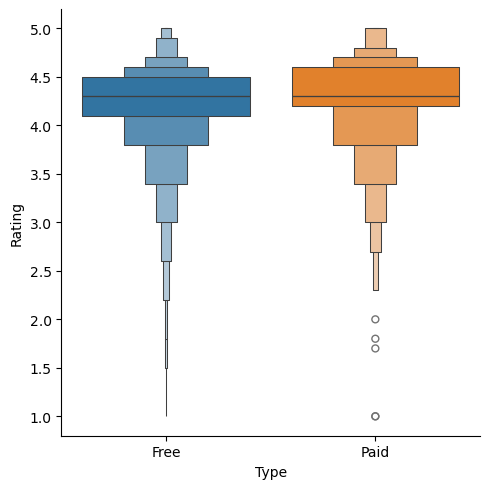

In [150]:
# Type vs Rating Analysis
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = df.sort_values('Rating',ascending=False),kind='boxen',hue='Type')

<Axes: xlabel='Content Rating', ylabel='Installs'>

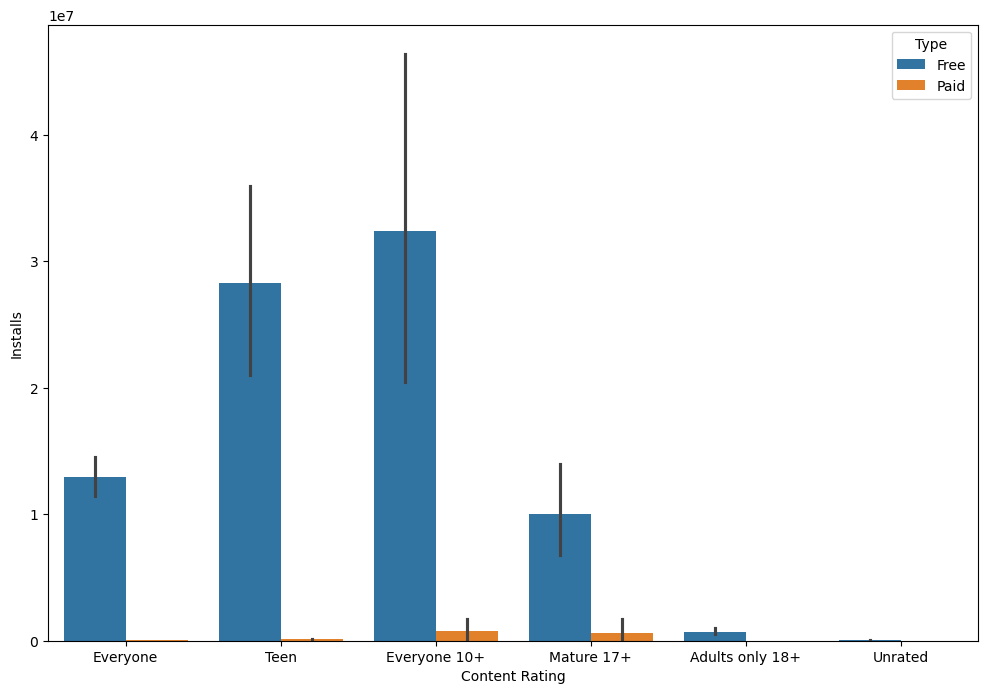

In [152]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=df)

Text(0.5, 1.0, 'Time series plot of Last Updates')

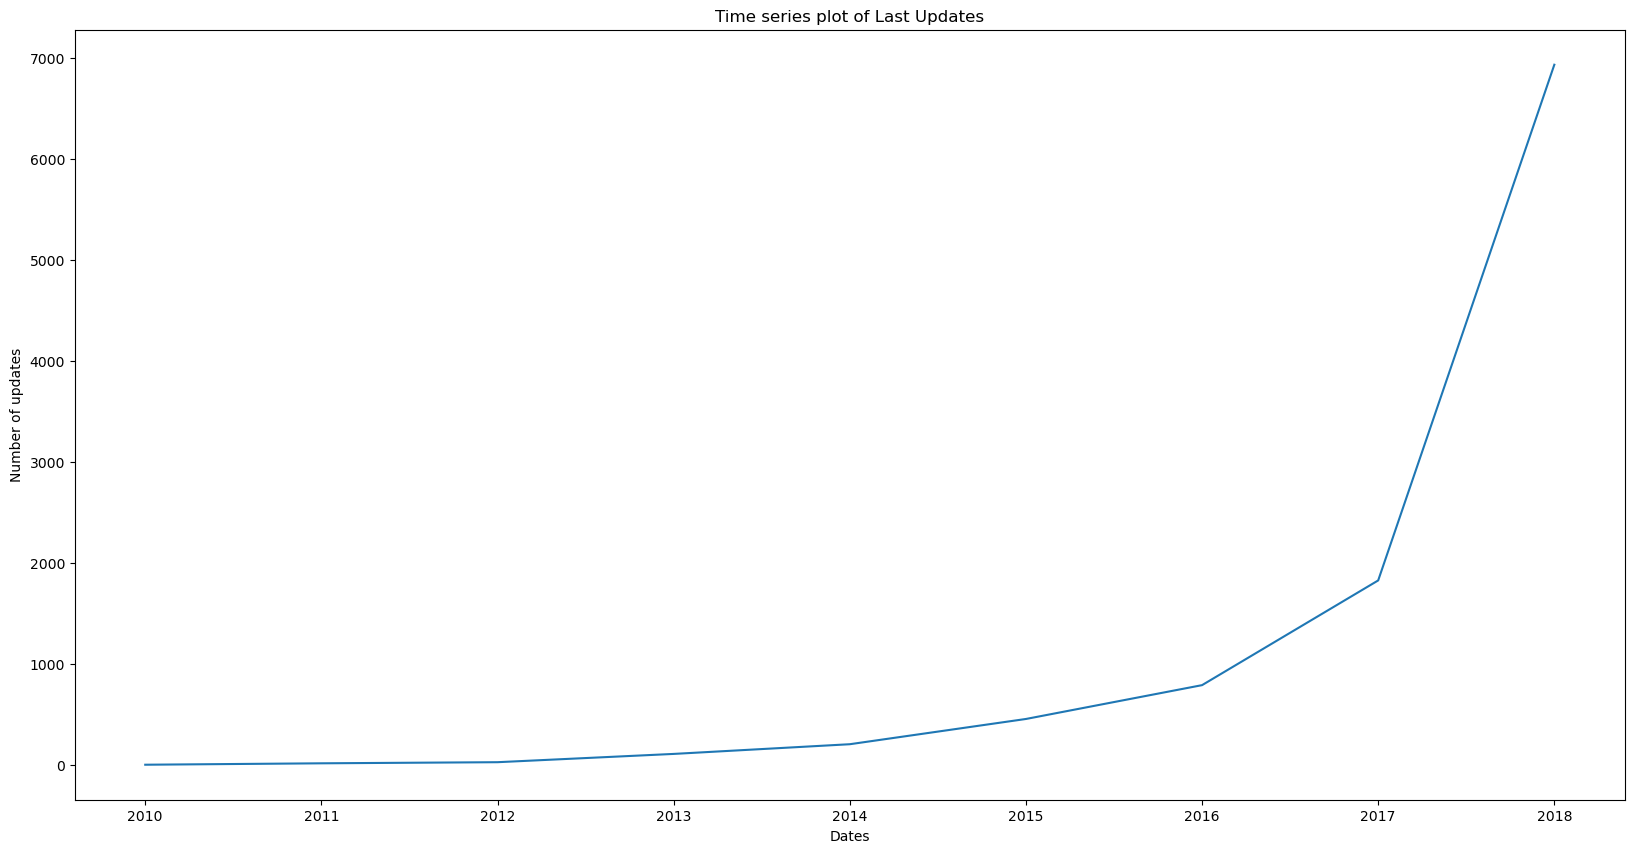

In [159]:
freq= pd.Series()
freq=df['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

In [161]:
# Feature Pruning

In [163]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver']

In [165]:
df['Type'] = df['Type'].map({'Free':0,"Paid":1})

In [167]:
high_review_apps = df[df['Reviews'] > 2_000_000]
high_review_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,13.0,100000000,0,0.0,Teen,Books & Reference,Varies with device,Varies with device,8,2018
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,13.0,1000000000,0,0.0,Everyone,Communication,Varies with device,Varies with device,8,2018
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,13.0,1000000000,0,0.0,Everyone,Communication,Varies with device,Varies with device,8,2018
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,13.0,1000000000,0,0.0,Everyone,Communication,Varies with device,Varies with device,8,2018
340,Gmail,COMMUNICATION,4.3,4604324,13.0,1000000000,0,0.0,Everyone,Communication,Varies with device,Varies with device,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58.0,100000000,0,0.0,Mature 17+,Action,3.2.1c,4.0 and up,7,2018
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,13.0,100000000,0,0.0,Everyone,Travel & Local,9.2.17.13,4.1 and up,6,2018
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71.0,100000000,0,0.0,Everyone,Casual,5.2.6,2.3 and up,8,2018
10190,Fallout Shelter,FAMILY,4.6,2721923,25.0,10000000,0,0.0,Teen,Simulation,1.13.12,4.1 and up,6,2018


In [169]:
df = df[df['Reviews'] <= 2_000_000]

In [171]:
df.shape

(9948, 14)

In [173]:
#  Apply log transformation (np.log1p) to Reviews and Installs.

df['Reviews_log'] = np.log1p(df['Reviews'])
df['Installs_log'] = np.log1p(df['Installs'])


C:\Users\DELL\AppData\Local\Temp\ipykernel_12444\1053909619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews_log'] = np.log1p(df['Reviews'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_12444\1053909619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs_log'] = np.log1p(df['Installs'])


In [177]:
df.drop(df[['Reviews','Installs']],axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12444\2064851368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[['Reviews','Installs']],axis=1,inplace=True)


In [179]:
df

,App,Category,Rating,Size,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year,Reviews_log,Installs_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,0,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018,5.075174,9.210440
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018,6.875232,13.122365
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,0,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018,11.379520,15.424949
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,0,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018,12.281389,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,0,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018,6.875232,11.512935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,53.0,0,0.0,Everyone,Education,1.48,4.1 and up,7,2017,3.663562,8.517393
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,3.6,0,0.0,Everyone,Education,1.0,4.1 and up,7,2018,1.609438,4.615121
10838,Parkinson Exercices FR,MEDICAL,4.3,9.5,0,0.0,Everyone,Medical,1.0,2.2 and up,1,2017,1.386294,6.908755
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,13.0,0,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,1,2015,4.744932,6.908755


In [222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [183]:
target = 'Rating'

In [185]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [195]:
X_train.shape

(6963, 9)

In [199]:
from collections import defaultdict

le_dict = defaultdict()

In [201]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = le.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    le_dict[col] = le # Saving the label encoder for individual features

In [206]:
X_train

,Category,Size,Type,Price,Content Rating,Updated_Month,Updated_Year,Reviews_log,Installs_log
942,9,17.0,0,0.0,4,7,2018,10.968698,15.424949
3674,31,3.3,0,0.0,1,7,2018,8.276649,13.122365
9646,4,21.0,0,0.0,4,9,2017,2.639057,6.908755
4066,11,20.0,0,0.0,4,5,2018,6.608001,11.512935
773,8,6.6,0,0.0,1,11,2016,7.768110,11.512935
...,...,...,...,...,...,...,...,...,...
6573,14,49.0,0,0.0,2,7,2018,13.562849,16.118096
6022,11,3.3,0,0.0,1,4,2018,1.791759,6.216606
6224,3,18.0,0,0.0,1,9,2017,5.659482,9.210440
1059,12,40.0,0,0.0,1,7,2018,13.772576,16.118096


# Standardization

In [209]:
# Converting and adding "Last Updated Month" to categorical features
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [211]:
numeric_features

Index(['Size', 'Type', 'Price', 'Updated_Year', 'Reviews_log', 'Installs_log'], dtype='object')

In [213]:
scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

In [215]:
X_train

,Category,Size,Type,Price,Content Rating,Updated_Month,Updated_Year,Reviews_log,Installs_log
942,9,-0.111445,-0.289079,-0.06549,4,7,0.569248,0.989418,1.075223
3674,31,-0.793816,-0.289079,-0.06549,1,7,0.569248,0.333947,0.542516
9646,4,0.087787,-0.289079,-0.06549,4,9,-0.308253,-1.038719,-0.895016
4066,11,0.037979,-0.289079,-0.06549,4,5,0.569248,-0.072343,0.170171
773,8,-0.629449,-0.289079,-0.06549,1,11,-1.185755,0.210125,0.170171
...,...,...,...,...,...,...,...,...,...
6573,14,1.482413,-0.289079,-0.06549,2,7,0.569248,1.621053,1.235584
6022,11,-0.793816,-0.289079,-0.06549,1,4,0.569248,-1.245022,-1.055146
6224,3,-0.061637,-0.289079,-0.06549,1,9,-0.308253,-0.303293,-0.362516
1059,12,1.034141,-0.289079,-0.06549,1,7,0.569248,1.672119,1.235584


# Train linear regression

In [218]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [224]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Model Performance:
MSE: 0.2114
RMSE: 0.4598
R²: 0.0997


In [226]:
mse

0.2113897007820573